## Wind stress

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_rcpwarm,710
1,1deg_jra55_ryf_rcpcool,286
2,1deg_jra55_ryf_rcpcont,710
3,1deg_jra55_ryf_red3DSK_C9,12644
4,1deg_jra55_ryf_RCPcool,570
5,1deg_jra55_ryf_RCPwarmhumid,840
6,1deg_jra55_ryf_RCPcont,840
7,1deg_jra55_ryf_RCPwarmhumid2x,840
8,1deg_jra55_ryf_RCPcoolhumid,840
9,1deg_jra55_ryf_RCPcoolhumid2x,840


Loading variables

In [5]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_warm = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [6]:
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable = 'temp_global_ave'
darray_warm2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_warm2x = darray_warm2x.groupby('time.year').mean(dim='time')
darray_swarm2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm2x = darray_swarm2x.groupby('time.year').mean(dim='time')
temp_warm2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm2x = temp_warm2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm2x = cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_warm2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [7]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable = 'temp_global_ave'
darray_cool = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool = darray_cool.groupby('time.year').mean(dim='time')
darray_scool = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool = darray_scool.groupby('time.year').mean(dim='time')
temp_cool = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool = temp_cool.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cool= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cool = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [8]:
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable = 'temp_global_ave'
darray_cool2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool2x = darray_cool2x.groupby('time.year').mean(dim='time')
darray_scool2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool2x = darray_scool2x.groupby('time.year').mean(dim='time')
temp_cool2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool2x = temp_cool2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cool2x= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cool2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [9]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)




### wind stress 

In [189]:
expt = '1deg_jra55_ryf_RCPcont'

tau_x = cc.querying.getvar(expt,'tau_x',session, ncfile = 'ocean_month.nc').groupby('time.year').mean(dim='time')
tau_y = cc.querying.getvar(expt,'tau_y',session, ncfile = 'ocean_month.nc').groupby('time.year').mean(dim='time')

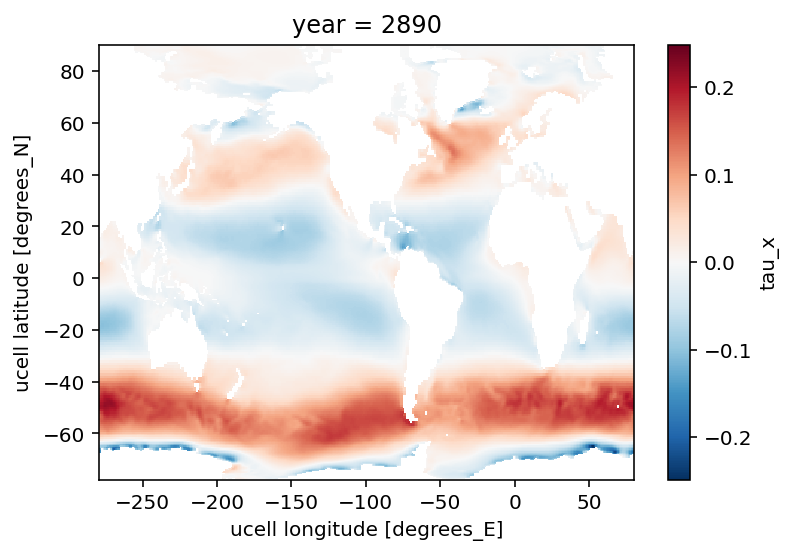

In [190]:
tau_x.isel(year=0).plot()

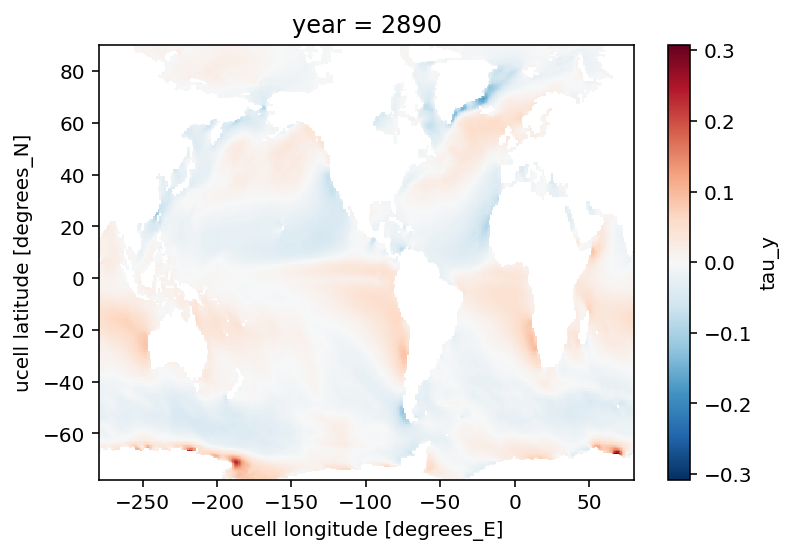

In [197]:
tau_y.isel(year=0).plot()

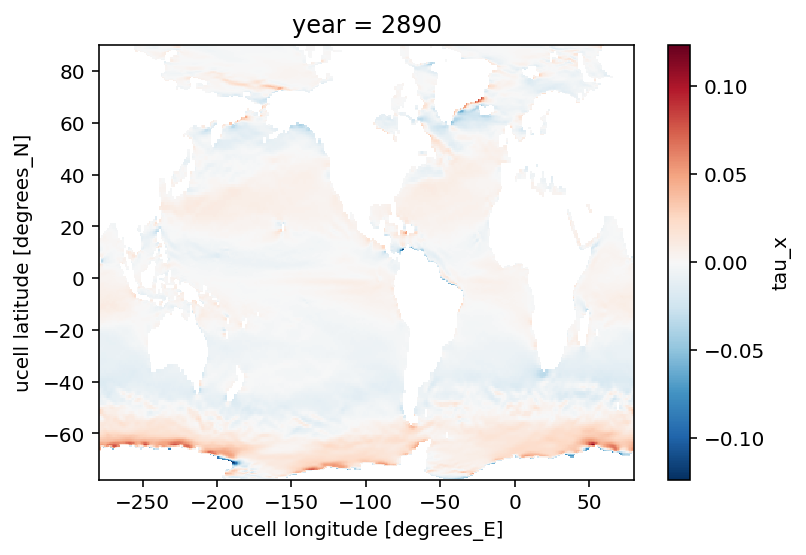

In [199]:
tau_x.differentiate('yu_ocean').isel(year = 0).plot()

In [200]:
wind_stress_curl = (tau_y.differentiate('xu_ocean')-tau_x.differentiate('yu_ocean'))#/(rho_0*f)

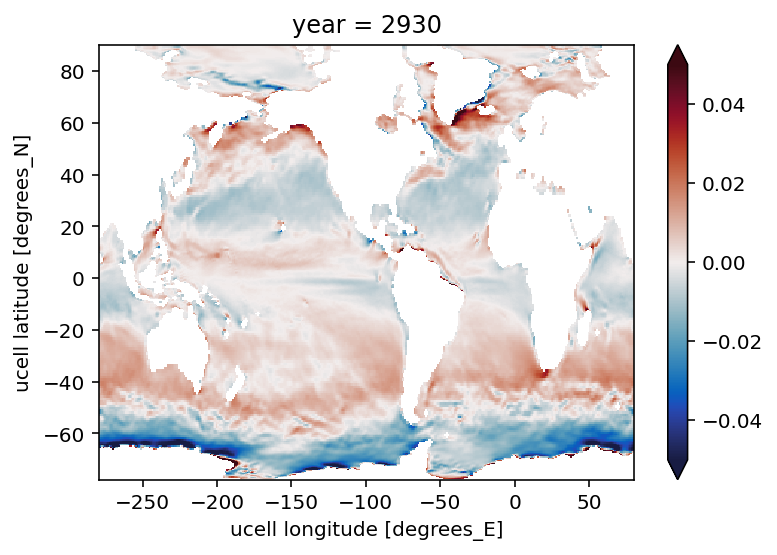

In [202]:
wind_stress_curl.isel(year = 40).plot(cmap = cm.cm.balance, vmin = -0.05,vmax=0.05)

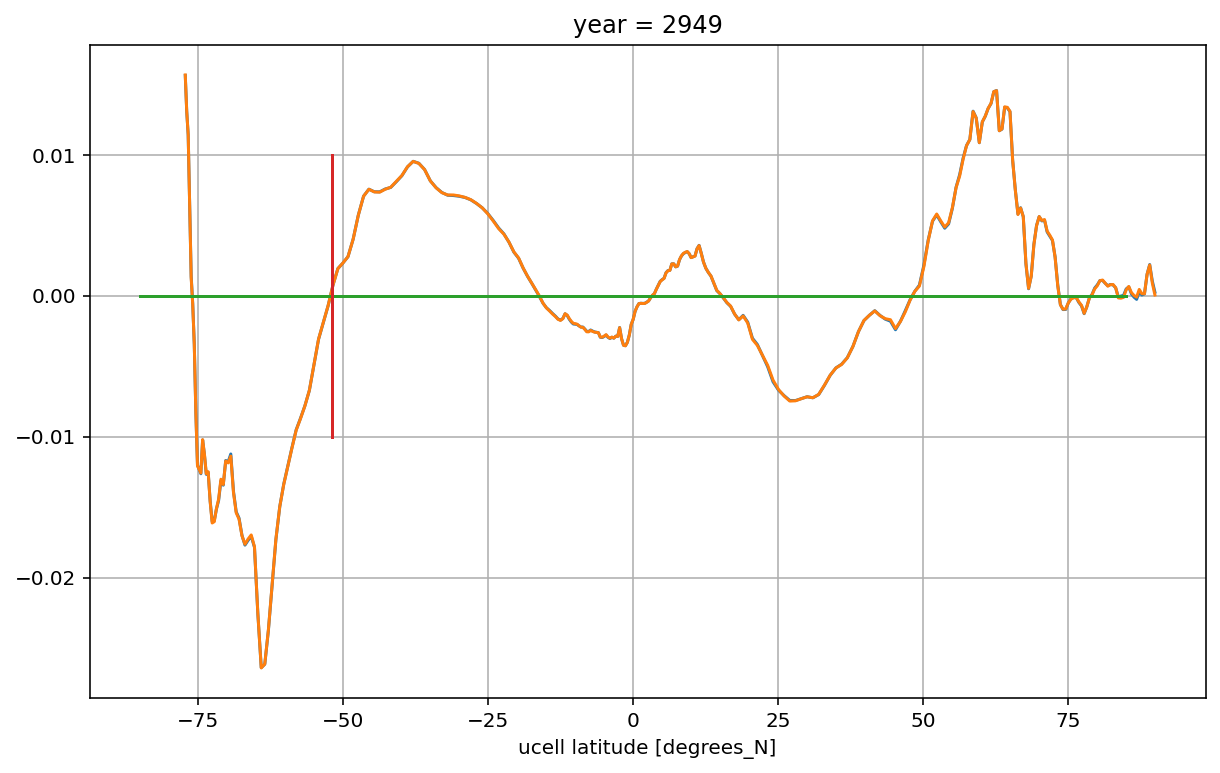

In [215]:
fig = plt.figure(figsize=(10,6))
wind_stress_curl.isel(year = 0).mean('xu_ocean').plot()
wind_stress_curl.isel(year = 59).mean('xu_ocean').plot()
plt.plot(np.linspace(-85,85,10),np.zeros(10))
plt.grid()
plt.plot(np.array([-52,-52]),np.array([-0.01,0.01]))
#cmap = cm.cm.balance)#, vmin = -0.05,vmax=0.05)#cmap = cm.cm.balance)#, vmin = -0.05,vmax=0.05)

find where wind stress curl changes sign:

In [226]:
densityof52deg = pot_rho_cont.mean('xt_ocean').mean('year').isel(st_ocean = 0).sel(yt_ocean = -52, method = 'nearest')
densityof52deg.values

array(1035.9901, dtype=float32)

In [20]:
densityof52deg = pot_rho_warm.mean('xt_ocean').isel(year = 59).isel(st_ocean = 0).sel(yt_ocean = -52, method = 'nearest')
densityof52deg.values

array(1035.7703, dtype=float32)

In [42]:
x = densityof52deg.values
y = np.array([1,2,3])
y

array([1, 2, 3])

In [43]:
np.array([densityof52deg.values])

array([1035.7703], dtype=float32)

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


<Figure size 432x288 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

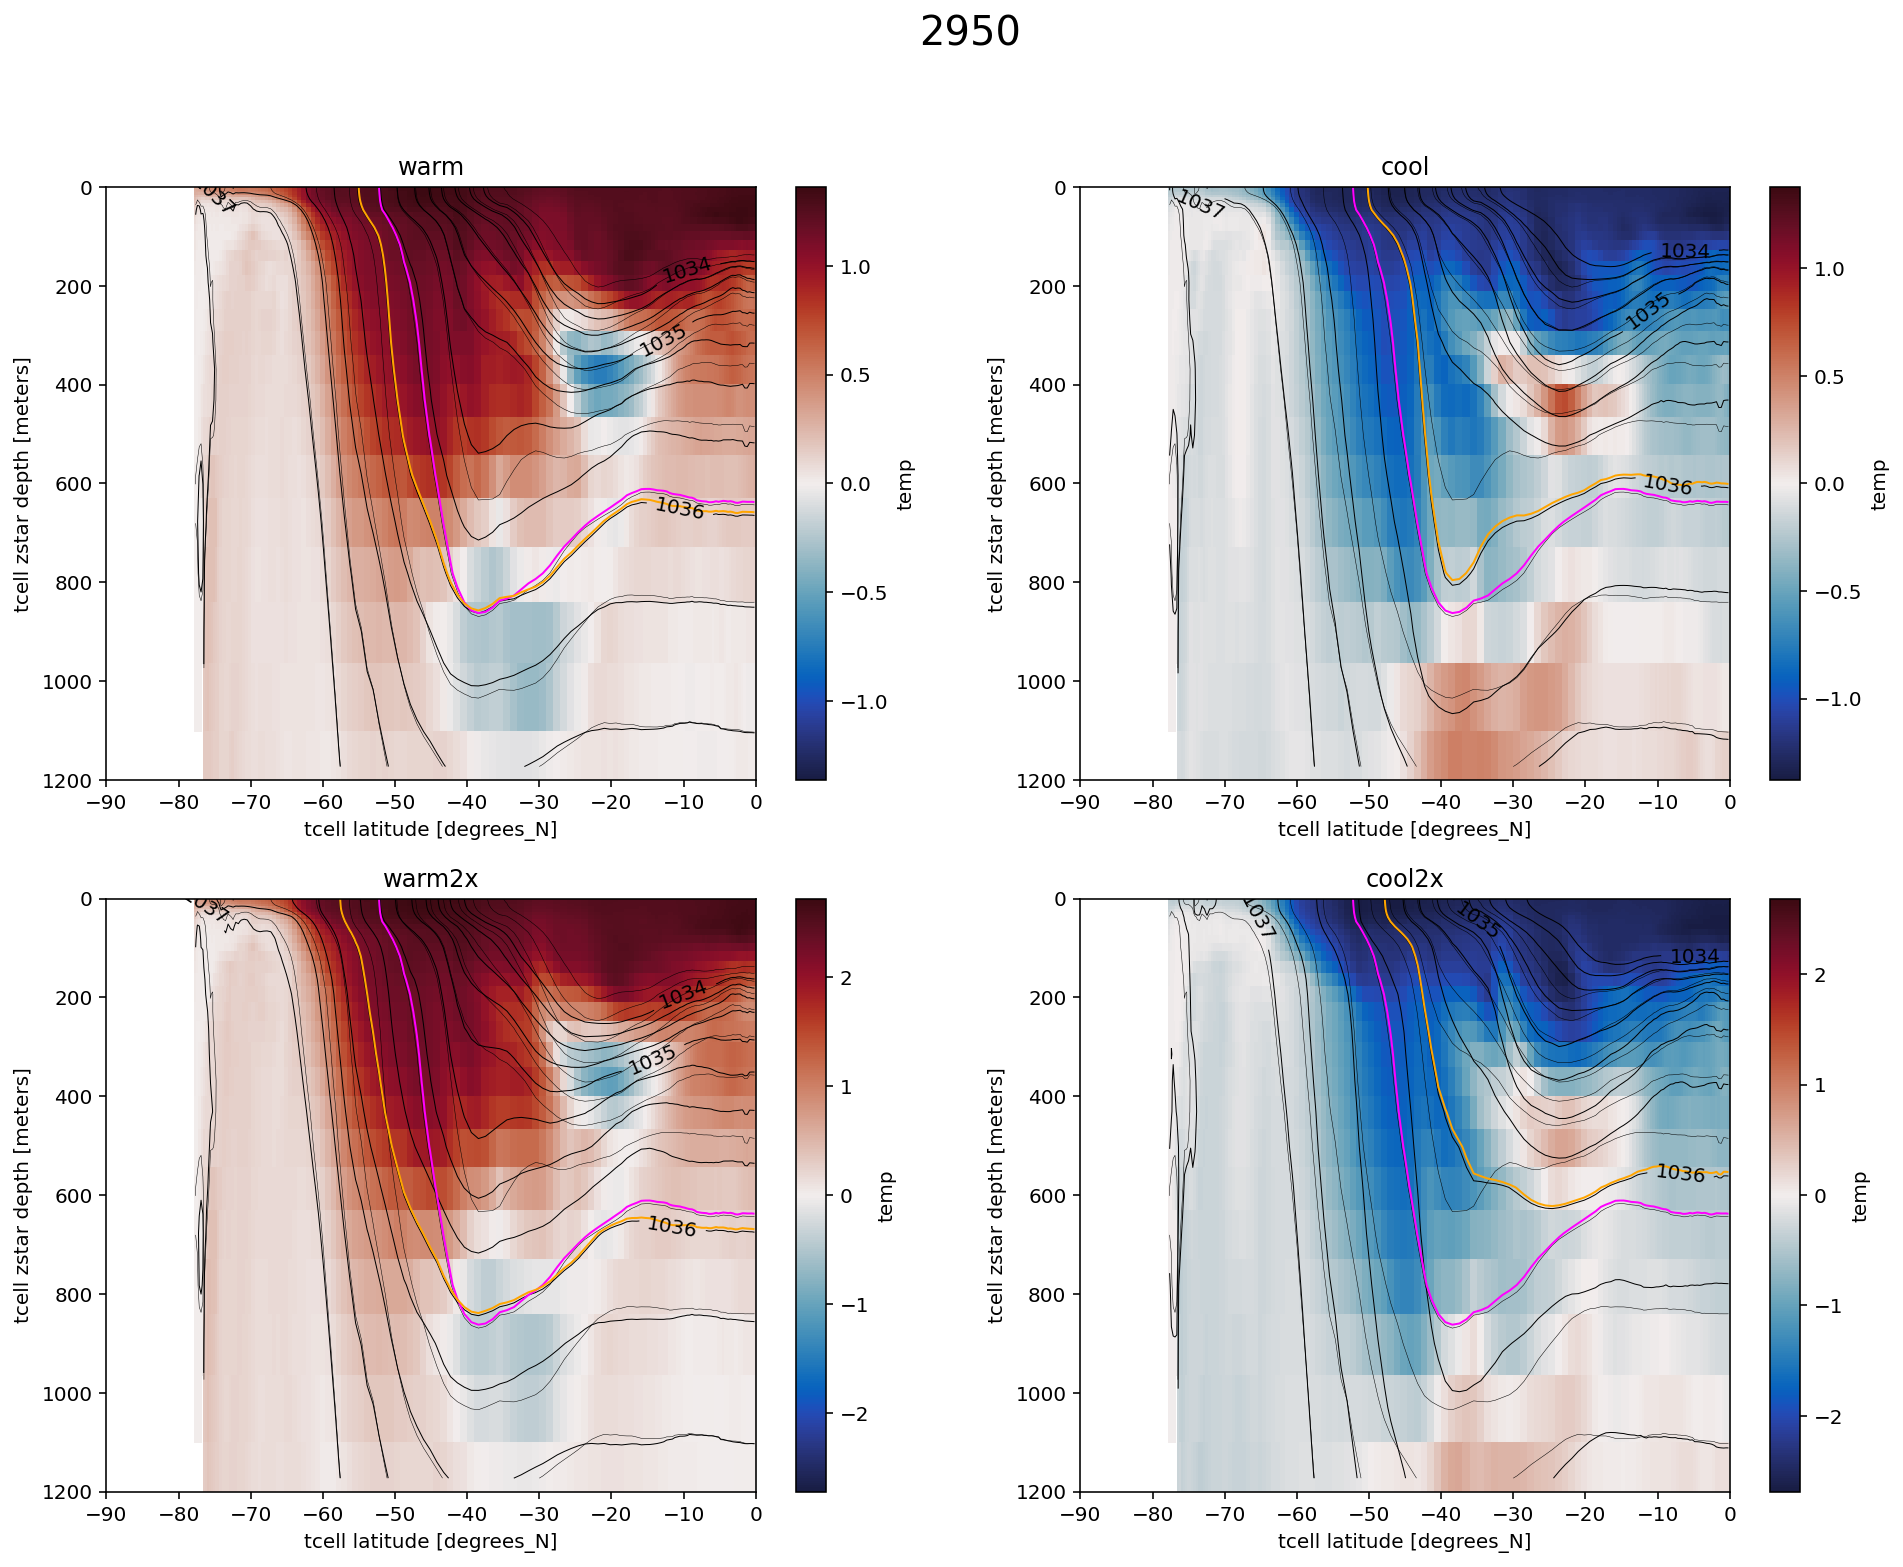

In [242]:
for i in np.arange(8,60):
    plt.clf()
    #fig = plt.figure(figsize = (10,6))
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (16,12))
    plt.suptitle(str(2891+i), fontsize = 20)

    (temp_warm - temp_cont).groupby('time.year').mean('time').mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200)).plot(yincrease = False, cmap = cm.cm.balance, ax=axes[0, 0])
    pot_rho_warm_av = pot_rho_warm.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av = pot_rho_cont.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av_mean = pot_rho_cont.mean('xt_ocean').mean('year').sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    

    clevel = np.arange(1034,1038,0.25)
    cs = axes[0,0].contour(pot_rho_warm_av.yt_ocean, pot_rho_warm_av.st_ocean, pot_rho_warm_av, levels=clevel, colors='k', linewidths=0.5)
    cs2 = axes[0,0].contour(pot_rho_cont_av.yt_ocean, pot_rho_cont_av.st_ocean, pot_rho_cont_av, levels=clevel, colors='k', linestyle = 'dotted', linewidths=0.25)
    cs3 = axes[0,0].contour(pot_rho_cont_av_mean.yt_ocean, pot_rho_cont_av_mean.st_ocean, pot_rho_cont_av_mean, levels=np.array([1035.9901]), colors='magenta', linewidths=1)
    cs4 = axes[0,0].contour(pot_rho_warm_av.yt_ocean, pot_rho_warm_av.st_ocean, pot_rho_warm_av, levels=np.array([1035.9901]), colors='orange', linewidths=1)

    axes[0,0].set_ylim(1200,0)
    axes[0,0].set_xlim(-90,0)
    axes[0,0].clabel(cs, [1034.0,1035.0,1036.0,1037.0], fmt = '%1.0f')
    axes[0,0].set_title('warm')
    
    (temp_warm2x - temp_cont).groupby('time.year').mean('time').mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200)).plot(yincrease = False, cmap = cm.cm.balance, ax=axes[1, 0])
    pot_rho_warm2x_av = pot_rho_warm2x.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av = pot_rho_cont.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av_mean = pot_rho_cont.mean('xt_ocean').mean('year').sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    

    clevel = np.arange(1034,1038,0.25)
    cs = axes[1,0].contour(pot_rho_warm2x_av.yt_ocean, pot_rho_warm2x_av.st_ocean, pot_rho_warm2x_av, levels=clevel, colors='k', linewidths=0.5)
    cs2 = axes[1,0].contour(pot_rho_cont_av.yt_ocean, pot_rho_cont_av.st_ocean, pot_rho_cont_av, levels=clevel, colors='k', linestyle = 'dotted', linewidths=0.25)
    cs3 = axes[1,0].contour(pot_rho_cont_av_mean.yt_ocean, pot_rho_cont_av_mean.st_ocean, pot_rho_cont_av_mean, levels=np.array([1035.9901]), colors='magenta', linewidths=1)
    cs4 = axes[1,0].contour(pot_rho_warm2x_av.yt_ocean, pot_rho_warm2x_av.st_ocean, pot_rho_warm2x_av, levels=np.array([1035.9901]), colors='orange', linewidths=1)

    axes[1,0].set_ylim(1200,0)
    axes[1,0].set_xlim(-90,0)
    axes[1,0].clabel(cs, [1034.0,1035.0,1036.0,1037.0], fmt = '%1.0f')
    axes[1,0].set_title('warm2x')
    
    (temp_cool - temp_cont).groupby('time.year').mean('time').mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200)).plot(yincrease = False, cmap = cm.cm.balance, ax=axes[0, 1])
    pot_rho_cool_av = pot_rho_cool.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av = pot_rho_cont.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av_mean = pot_rho_cont.mean('xt_ocean').mean('year').sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    

    clevel = np.arange(1034,1038,0.25)
    cs = axes[0,1].contour(pot_rho_cool_av.yt_ocean, pot_rho_cool_av.st_ocean, pot_rho_cool_av, levels=clevel, colors='k', linewidths=0.5)
    cs2 = axes[0,1].contour(pot_rho_cont_av.yt_ocean, pot_rho_cont_av.st_ocean, pot_rho_cont_av, levels=clevel, colors='k', linestyle = 'dotted', linewidths=0.25)
    cs3 = axes[0,1].contour(pot_rho_cont_av_mean.yt_ocean, pot_rho_cont_av_mean.st_ocean, pot_rho_cont_av_mean, levels=np.array([1035.9901]), colors='magenta', linewidths=1)
    cs4 = axes[0,1].contour(pot_rho_cool_av.yt_ocean, pot_rho_cool_av.st_ocean, pot_rho_cool_av, levels=np.array([1035.9901]), colors='orange', linewidths=1)

    axes[0,1].set_ylim(1200,0)
    axes[0,1].set_xlim(-90,0)
    axes[0,1].clabel(cs, [1034.0,1035.0,1036.0,1037.0], fmt = '%1.0f')
    axes[0,1].set_title('cool')    
    
    (temp_cool2x - temp_cont).groupby('time.year').mean('time').mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200)).plot(yincrease = False, cmap = cm.cm.balance, ax=axes[1, 1])
    pot_rho_cool2x_av = pot_rho_cool2x.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av = pot_rho_cont.mean('xt_ocean').isel(year = i).sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    pot_rho_cont_av_mean = pot_rho_cont.mean('xt_ocean').mean('year').sel(yt_ocean = slice(-90,0),st_ocean = slice(0,1200))
    

    clevel = np.arange(1034,1038,0.25)
    cs = axes[1,1].contour(pot_rho_cool2x_av.yt_ocean, pot_rho_cool2x_av.st_ocean, pot_rho_cool2x_av, levels=clevel, colors='k', linewidths=0.5)
    cs2 = axes[1,1].contour(pot_rho_cont_av.yt_ocean, pot_rho_cont_av.st_ocean, pot_rho_cont_av, levels=clevel, colors='k', linestyle = 'dotted', linewidths=0.25)
    cs3 = axes[1,1].contour(pot_rho_cont_av_mean.yt_ocean, pot_rho_cont_av_mean.st_ocean, pot_rho_cont_av_mean, levels=np.array([1035.9901]), colors='magenta', linewidths=1)
    cs4 = axes[1,1].contour(pot_rho_cool2x_av.yt_ocean, pot_rho_cool2x_av.st_ocean, pot_rho_cool2x_av, levels=np.array([1035.9901]), colors='orange', linewidths=1)

    axes[1,1].set_ylim(1200,0)
    axes[1,1].set_xlim(-90,0)
    axes[1,1].clabel(cs, [1034.0,1035.0,1036.0,1037.0], fmt = '%1.0f')
    axes[1,1].set_title('cool2x')    

    plt.savefig('pictures3/isopycnal_'+str(2891+i))
    print(i)